In [70]:
#Importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [47]:
#df = pd.read_csv('C:\\Users\\chbn\\Downloads\\title.principals.tsv.gz', sep='\t')
#df.to_parquet(
#    'output.parquet',
#    engine='pyarrow',  # Meilleures performances que fastparquet
#    compression='snappy',  # snappy (rapide) ou gzip (meilleure compression)
#    index=False
#)

# Title Basics

In [3]:
#Lecture du dataframe title.basics
df = pd.read_parquet("C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\title.basics.parquet")

In [4]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,0,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,0,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,0,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,0,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,0,1,Short


In [44]:
returnKing = df.loc[(df['originalTitle'] == 'The Lord of the Rings: The Return of the King') & (df['titleType'] == 'movie')]
print(returnKing)

             tconst titleType                                   primaryTitle  \
161575    tt0167260     movie  The Lord of the Rings: The Return of the King   
8131351  tt33436943     movie  The Lord of the Rings: The Return of the King   

                                         originalTitle  isAdult  startYear  \
161575   The Lord of the Rings: The Return of the King        0       2003   
8131351  The Lord of the Rings: The Return of the King        0       2010   

         endYear  runtimeMinutes                   genres  
161575         0             201  Adventure,Drama,Fantasy  
8131351        0               0                      NaN  


# Exploration du DF Title Basics en faisant une copie du DF initial

In [6]:
#Copie de title.basics
dfcopy = df.copy()

In [ ]:
#Description du df title.basics
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11353395 entries, 0 to 11353394
Data columns (total 9 columns):
 #   Column          Dtype   
---  ------          -----   
 0   tconst          string  
 1   titleType       category
 2   primaryTitle    string  
 3   originalTitle   string  
 4   isAdult         Int8    
 5   startYear       Int32   
 6   endYear         Int32   
 7   runtimeMinutes  Int32   
 8   genres          category
dtypes: Int32(3), Int8(1), category(2), string(3)
memory usage: 476.5 MB


In [ ]:
#Affichage des types de données dans title.basics
print(dfcopy.dtypes)

tconst            string[python]
titleType               category
primaryTitle      string[python]
originalTitle     string[python]
isAdult                     Int8
startYear                  Int32
endYear                    Int32
runtimeMinutes             Int32
genres                  category
dtype: object


In [7]:
#Nombre de ligne du DF(title.basics)
print("Le nombre de ligne du DataFrame est de", len(dfcopy), "lignes")
#Remarque : Nombre de ligne (11353395)


Le nombre de ligne du DataFrame est de 11353395 lignes


In [8]:
#Nombre de valeurs null
nombreNull = dfcopy.isnull().sum()
print(nombreNull)

print("le nombre de valeurs vide dans primaryTitle est de : ", dfcopy['primaryTitle'].isnull().sum())
print("le nombre de valeurs vide dans originalTitle est de : ", dfcopy['originalTitle'].isnull().sum())
print("le nombre de valeurs vide dans genres est de : ", dfcopy['genres'].isnull().sum())

tconst                 0
titleType              0
primaryTitle          19
originalTitle         19
isAdult                0
startYear              0
endYear                0
runtimeMinutes         0
genres            501372
dtype: int64
le nombre de valeurs vide dans primaryTitle est de :  19
le nombre de valeurs vide dans originalTitle est de :  19
le nombre de valeurs vide dans genres est de :  501372


In [21]:
#Affichage du pourcentage de valeur vide dans title.basics

pourcentnullPT = dfcopy['primaryTitle'].isnull().mean()*100
print(pourcentnullPT,"%","de valeur vide dans primaryTitle")

pourcentnullgenres = dfcopy['genres'].isnull().mean()*100
print(f"{pourcentnullgenres:.2f}% de valeurs vides dans 'genres'")


0.0001673508232559512 % de valeur vide dans primaryTitle
4.42% de valeurs vides dans 'genres'


In [29]:
#Valeur unique dans chaque colonne du DF
#titleType
type = dfcopy['titleType'].unique()

#genre
genre = dfcopy['genres'].unique()

print(type)
print(genre)

#Remarque : On trouve 11 type dans la colonne titleType
#Remarque : On trouve 2381 valeurs unique dans la colonne genres

['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', ..., 'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot']
Length: 11
Categories (11, object): ['movie', 'short', 'tvEpisode', 'tvMiniSeries', ..., 'tvShort', 'tvSpecial', 'video', 'videoGame']
['Documentary,Short', 'Animation,Short', 'Animation,Comedy,Romance', 'Short', 'Short,Sport', ..., 'Adult,Animation,Talk-Show', 'Biography,Crime,Fantasy', 'Biography,Crime,Music', 'Mystery,Reality-TV,Thriller', 'Musical,Reality-TV,Talk-Show']
Length: 2382
Categories (2381, object): ['Action', 'Action,Adult', 'Action,Adult,Adventure', 'Action,Adult,Animation', ..., 'Thriller,Western', 'War', 'War,Western', 'Western']


In [30]:
#Affichage de tous les types de films
alltypelist = dfcopy['titleType'].unique().tolist()
print("La liste des genres des films est : ", alltypelist)

La liste des genres des films est :  ['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', 'tvSeries', 'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot']


In [31]:
#Affichage des top 10 des genres ayant le plus de films
topGenres = dfcopy['genres'].value_counts().head(10)
print(topGenres)

genres
Drama             1284664
Comedy             745835
Talk-Show          710162
News               592548
Documentary        546858
Drama,Romance      517507
Reality-TV         361835
Adult              316456
News,Talk-Show     254052
Short              221951
Name: count, dtype: int64


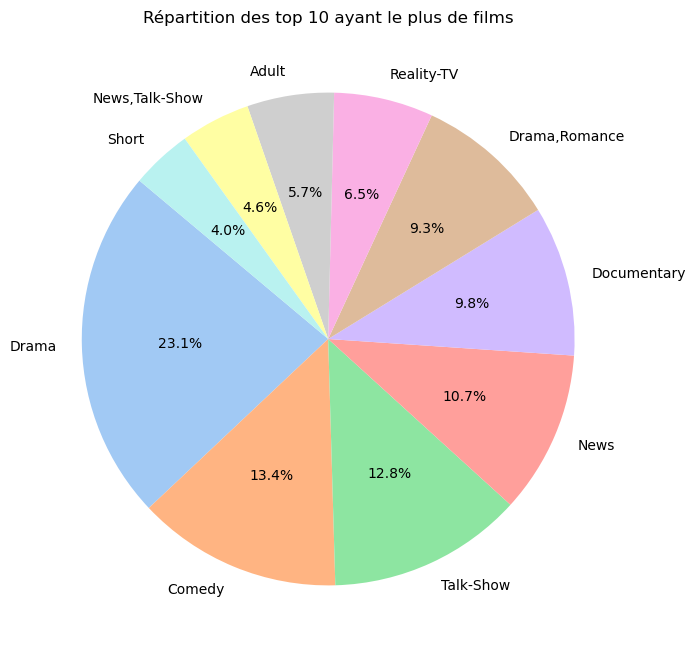

In [32]:
#Affichage graphique des top 10 genres ayant le plus de films

# Création du pie chart
plt.figure(figsize=(8, 8))
plt.pie(topGenres, labels=topGenres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

plt.title("Répartition des top 10 ayant le plus de films")

plt.show()



### tâche quel est le pourcentage % pour 1 genre, 2, 3 genres à faire

# 

In [33]:
#Description des quartiles pour chaque colonne
dfcopy.describe()

#Remarque : La valeur maximale pour la durée des films est de 59460 minutes
#Remarque : la valeur maximale pour la sortie du film est de 2031
#Remarque : endYear n'est pas une variable pertinente pour notre modèle, celle-ci ne sera pas pris en compte

,isAdult,startYear,endYear,runtimeMinutes
count,11353395.0,11353395.0,11353395.0,11353395.0
mean,0.032279,1755.491646,23.705342,13.712312
std,0.176741,663.494118,216.853753,46.118521
min,0.0,0.0,0.0,0.0
25%,0.0,1987.0,0.0,0.0
50%,0.0,2011.0,0.0,0.0
75%,0.0,2018.0,0.0,15.0
max,1.0,2031.0,2030.0,59460.0


<Axes: xlabel='startYear', ylabel='runtimeMinutes'>

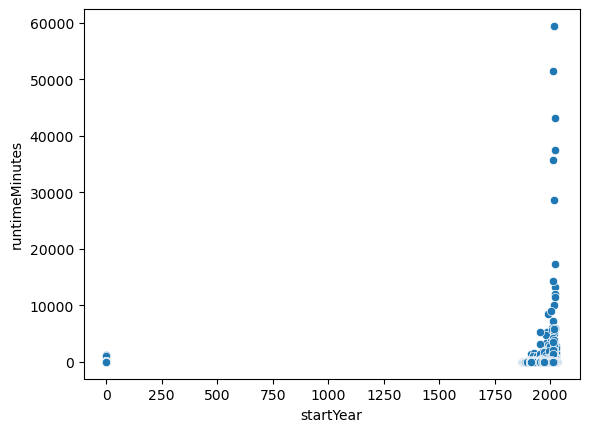

In [34]:
#Graphique : Répartition du durée des films par année de sortie
sns.scatterplot(data = dfcopy,
                x = 'startYear',
                y = 'runtimeMinutes',
                )

#On remarque que des durées sont supérieures à 3h (>180)
#On remarque que que des films ont pour année de sortie de 0

<Axes: xlabel='startYear', ylabel='runtimeMinutes'>

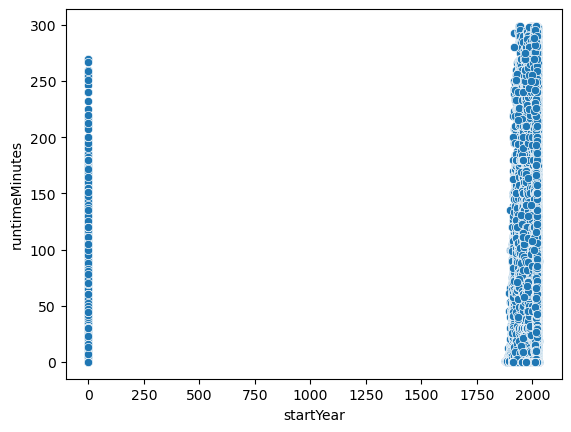

In [134]:
#Graphique : Affichage des durées de films < à 300
under300min = dfcopy[dfcopy['runtimeMinutes'] < 300]
sns.scatterplot(data = under300min,
                x = 'startYear',
                y = 'runtimeMinutes')
#Remarque : il reste des valeurs pour des startYear = 0

<Axes: xlabel='runtimeMinutes', ylabel='titleType'>

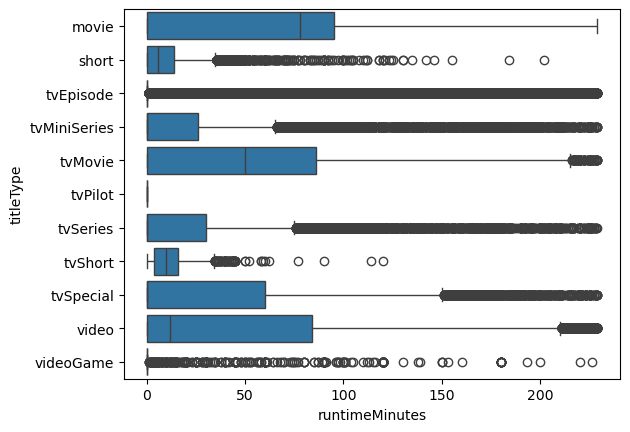

In [ ]:
notzero = under300min.loc[under300min['startYear'] > 0]
sns.boxplot(data = notzero,
            y = 'titleType',
            x = 'runtimeMinutes',
            )

# Focus sur un échantillon filtré sur "movie" et runtimeMinutes != 0, > 40mins et <300mins et isAdult == 0 et startYear < 2025, != 0
# Supprimer les variables qui ne seront pas utilisées et qui ne sont pas pertinentes

In [37]:
#Copie et Filtrage pour le nouveau dataframe, et suppression des colonnes non utilisées

df_filtered = dfcopy.query("titleType == 'movie' and isAdult == 0 and runtimeMinutes != 0 and runtimeMinutes > 40 and runtimeMinutes < 300 and startYear < 2026 and startYear != 0", engine= 'python').drop(
    columns=['primaryTitle', 'endYear', 'isAdult', 'titleType'])

In [38]:
#Affichage des 5ère valeurs du dataframe filtré
df_filtered.head()

,tconst,originalTitle,startYear,runtimeMinutes,genres
8,tt0000009,Miss Jerry,1894,45,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport"
498,tt0000502,Bohemios,1905,100,NaN
570,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,L'enfant prodigue,1907,90,Drama


In [39]:
#Affichage du nombre de lignes filtrés

print("le nombre de ligne est de :", len(df_filtered))

le nombre de ligne est de : 426292


In [40]:
#Affichage des valeurs vides restantes

df_filtered.isnull().sum()

tconst                0
originalTitle         1
startYear             0
runtimeMinutes        0
genres            24891
dtype: int64

In [41]:
#suppression des valeurs vides

dfcleaned = df_filtered.dropna()

In [42]:
#Affichage et vérification des valeurs vides restantes
dfcleaned.isnull().sum()

tconst            0
originalTitle     0
startYear         0
runtimeMinutes    0
genres            0
dtype: int64

In [43]:
#Affichage des quartiles du dataframe nettoyé selon les règles de filtrage
dfcleaned.describe()

,startYear,runtimeMinutes
count,401400.0,401400.0
mean,1997.596203,89.44493
std,26.688628,25.26068
min,1894.0,41.0
25%,1984.0,75.0
50%,2009.0,90.0
75%,2017.0,100.0
max,2025.0,299.0


<function matplotlib.pyplot.show(close=None, block=None)>

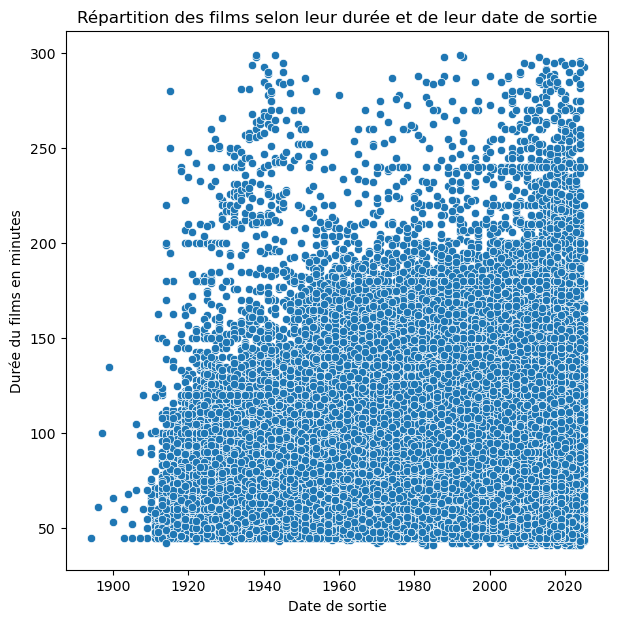

In [123]:
#Affichage graphique du dataframe filtré
plt.figure(figsize=(7,7))

sns.scatterplot(data= dfcleaned, x= 'startYear', y= 'runtimeMinutes')

plt.title("Répartition des films selon leur durée et de leur date de sortie")
plt.xlabel("Date de sortie")
plt.ylabel("Durée du films en minutes")

plt.show

In [54]:
#Affichage des 4 groupes (quartiles)
quartileDuree = dfcleaned['runtimeMinutes'].quantile([0,0.25,0.5,0.75,1])
print(quartileDuree)

0.00     41.0
0.25     75.0
0.50     90.0
0.75    100.0
1.00    299.0
Name: runtimeMinutes, dtype: Float64


C:\Users\chbn\AppData\Local\Temp\ipykernel_16512\187179796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcleaned['duree_quartile'] = pd.qcut(dfcleaned['runtimeMinutes'], q=4, labels=['Court(41-75mins)', 'Moyen(75-90mins)', 'Long(90-100mins)', 'Très long(100-299mins)'])


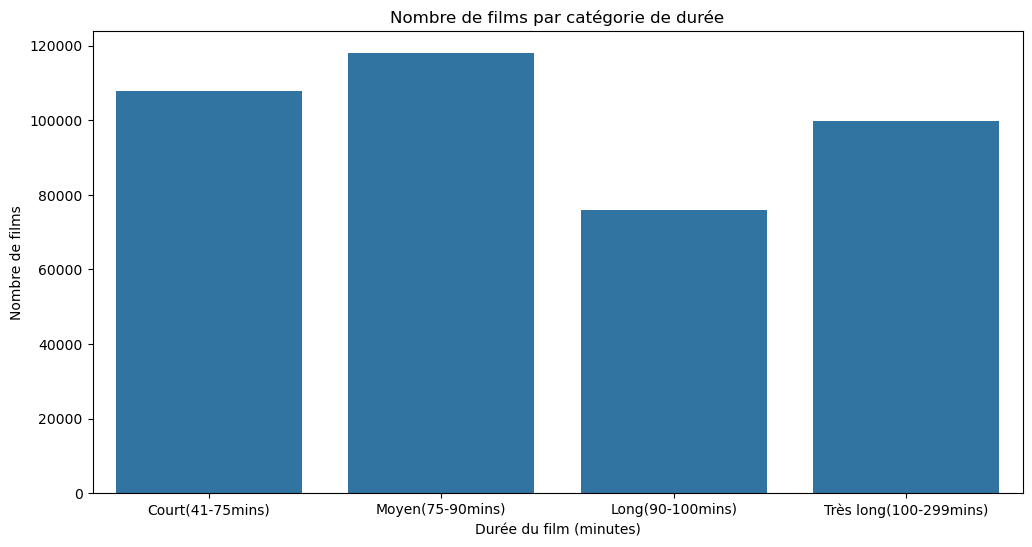

In [56]:
#Découpage en 4 groupes (quartiles)
dfcleaned['duree_quartile'] = pd.qcut(dfcleaned['runtimeMinutes'], q=4, labels=['Court(41-75mins)', 'Moyen(75-90mins)', 'Long(90-100mins)', 'Très long(100-299mins)'])

#Compte le nombre de films par quartile
nombreFilmParDuree = dfcleaned['duree_quartile'].value_counts().sort_index()

#Affichage du graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=nombreFilmParDuree.index, y=nombreFilmParDuree.values)

plt.xlabel("Durée du film (minutes)")
plt.ylabel("Nombre de films")
plt.title("Nombre de films par catégorie de durée")
plt.xticks(rotation=0)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\chbn\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\chbn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


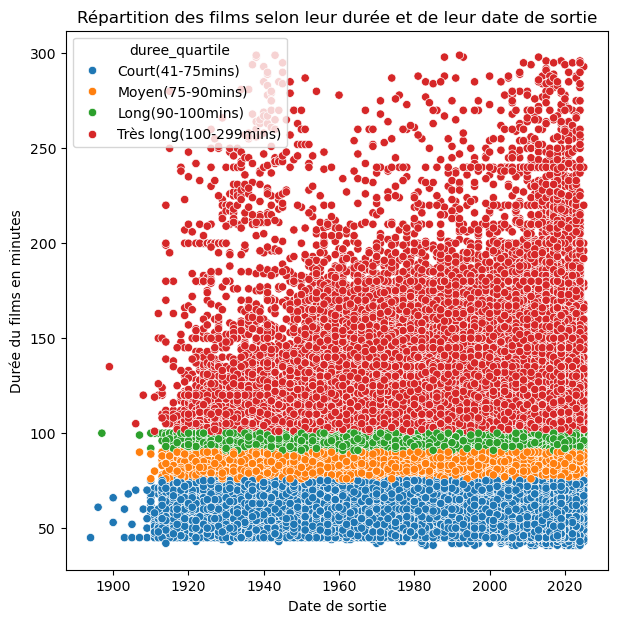

In [57]:
#Affichage graphique du dataframe filtré en soulignant les points selon leur catégorie
plt.figure(figsize=(7,7))

sns.scatterplot(data= dfcleaned, x= 'startYear', y= 'runtimeMinutes', hue = dfcleaned['duree_quartile'])

plt.title("Répartition des films selon leur durée et de leur date de sortie")
plt.xlabel("Date de sortie")
plt.ylabel("Durée du films en minutes")

plt.show

In [58]:
top10dfcleaned = dfcleaned['genres'].value_counts().head(10)
print(topGenres)
print(top10dfcleaned)



genres
Drama             1284664
Comedy             745835
Talk-Show          710162
News               592548
Documentary        546858
Drama,Romance      517507
Reality-TV         361835
Adult              316456
News,Talk-Show     254052
Short              221951
Name: count, dtype: int64
genres
Drama                   74217
Documentary             72710
Comedy                  30759
Comedy,Drama            11523
Drama,Romance           10877
Horror                   8438
Comedy,Romance           6169
Thriller                 5822
Action                   5544
Comedy,Drama,Romance     5089
Name: count, dtype: int64


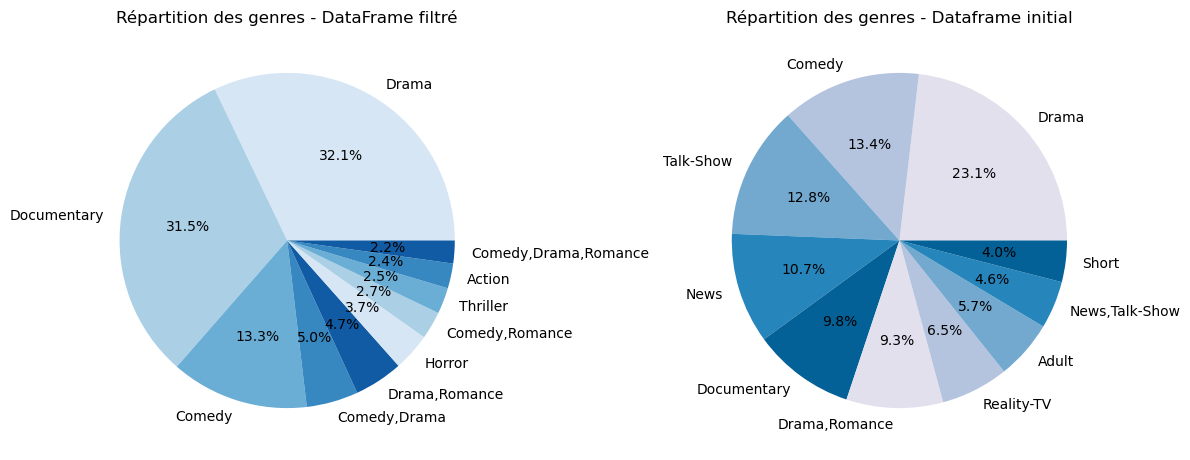

In [59]:
#Comparaison entre le dataframe initial et le dataframe filtré (piechart)

colors1 = sns.color_palette("Blues", n_colors=5)
colors2 = sns.color_palette("PuBu", n_colors=5)

labels1 = dfcleaned['genres'].value_counts().head(10).index  # Top 10 genres pour le dataframe filtré
sizes1 = dfcleaned['genres'].value_counts().head(10).values  # Nombre de films par genre pour dataframe filtré

labels2 = dfcopy['genres'].value_counts().head(10).index  # Top 10 genres pour dataframe initial
sizes2 = dfcopy['genres'].value_counts().head(10).values  # Nombre de films par genre pour dataframe initial

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', colors=colors1)
axes[0].set_title("Répartition des genres - DataFrame filtré")

axes[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', colors=colors2)
axes[1].set_title("Répartition des genres - Dataframe initial")

plt.tight_layout()
plt.show()

In [145]:
#Enregistrement du dataframe title.basics nettoyé/filtré

#format csv
#dfcleaned.to_csv('C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\title.basicsCLEAN.csv', index= False)

#format parquet
dfcleaned.to_parquet('C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\title.basicsCLEAN.parquet', index= False)

# Etape suivante : Analyse datafram title.principals

In [ ]:
#lecture du dataframe title.principals

dfp = pd.read_parquet('C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\title.principals.parquet')


In [137]:
dfp.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N


In [138]:
dfp['characters'].unique()

array(['["Self"]', '\\N', '["Blacksmith"]', ..., '["Erin (Husband 1)"]',
       '["Onan (Husband 2)"]',
       '["Self - Entrepreneur: The Jolly Roger Telephone Company"]'],
      dtype=object)

In [139]:
dfp['job'].unique()

array(['\\N', 'producer', 'director of photography', ...,
       'based on the original saga by', 'Story & Screenplay by',
       'original idea/ scriptwriter'], dtype=object)

In [140]:
da = pd.read_parquet('C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\title.akas.parquet')

In [142]:
da.head(100)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,\N,\N,original,\N,1
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
95,tt0000010,24,Выход рабочих с фабрики «Люмьер»,RU,\N,imdbDisplay,\N,0
96,tt0000010,25,Излизането от фабриките,BG,bg,imdbDisplay,\N,0
97,tt0000010,26,Радници напуштају фабрику Лимијер,RS,\N,imdbDisplay,\N,0
98,tt0000010,27,工場の出口,JP,ja,imdbDisplay,\N,0


In [135]:
# Lire le fichier Parquet
df = pd.read_parquet('output.parquet', engine='pyarrow')

# Afficher les premières lignes
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'output.parquet'

In [ ]:
print(dt['genres'].str.contains('Reality-TV', na=False).any())  # Devrait afficher False


True


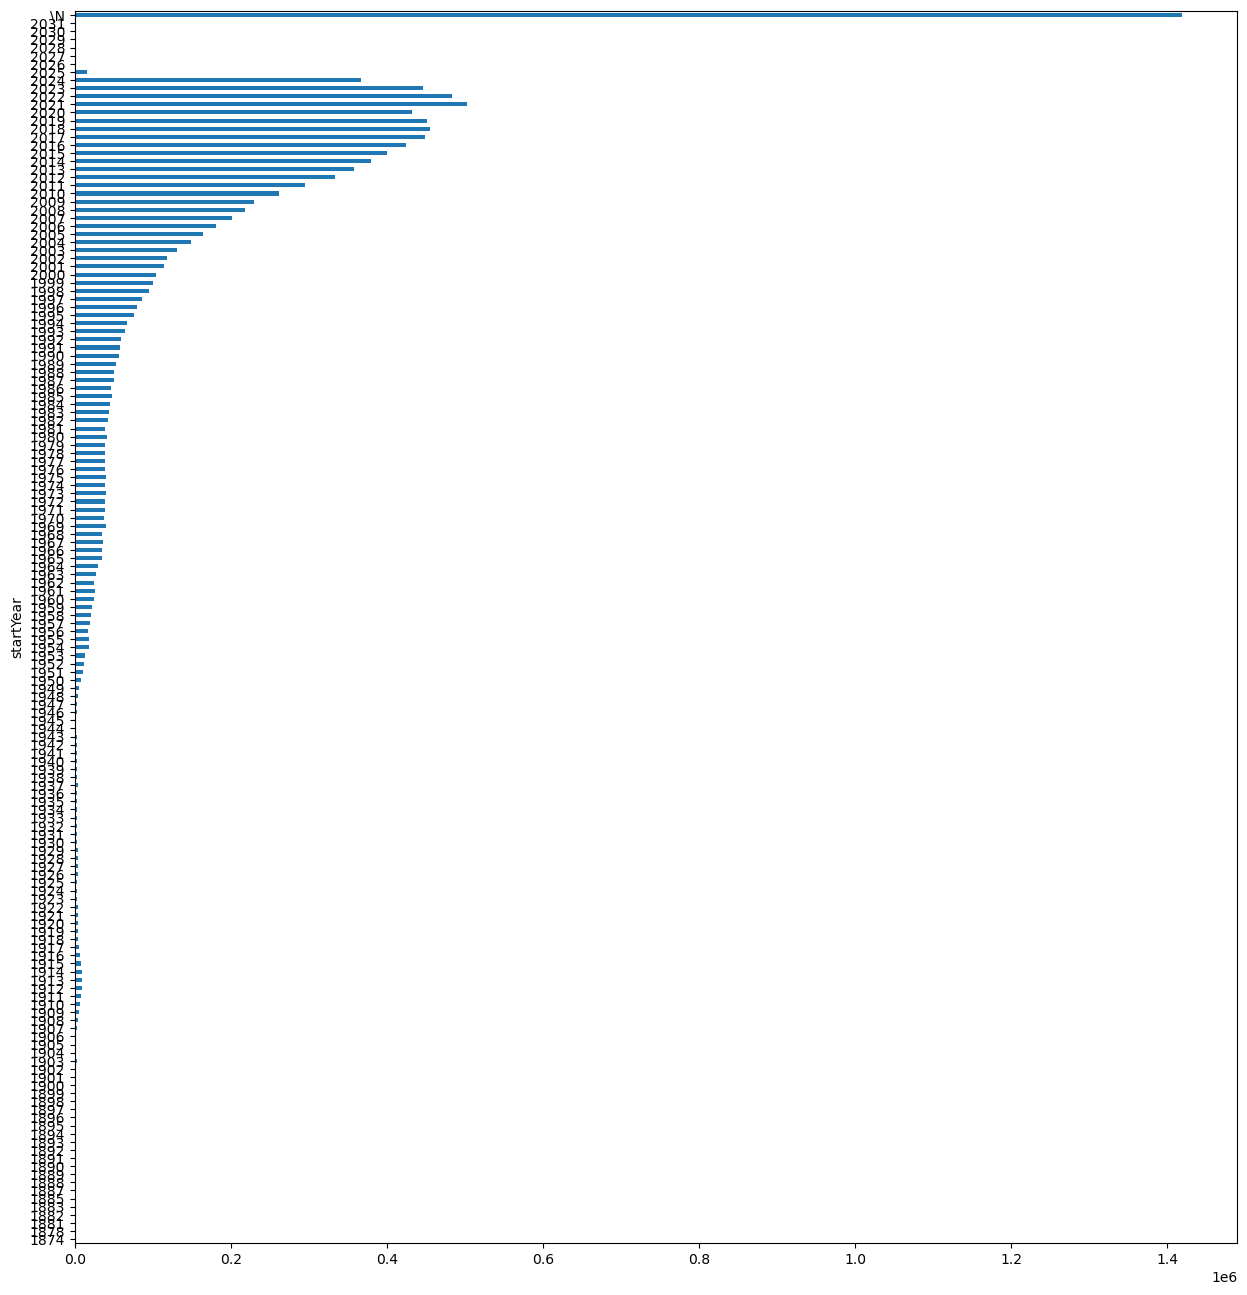

In [ ]:
dt.startYear.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(15,16))
plt.show()

# Jointure des DF title.basics avec les ratings

In [3]:
import pandas as pd
#Lecture de la table title.ratings filtré

dfcleaned = pd.read_parquet('C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\title.basicsCLEAN.parquet')

In [4]:
#Lecture de la table title.ratings filtré

dfrating = pd.read_parquet('C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\title.ratings.parquet')

dfrating.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2131
1,tt0000002,5.6,289
2,tt0000003,6.4,2167
3,tt0000004,5.3,184
4,tt0000005,6.2,2894


In [3]:
dfcleaned.head()

,tconst,originalTitle,startYear,runtimeMinutes,genres,duree_quartile
0,tt0000009,Miss Jerry,1894,45,Romance,Court(41-75mins)
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",Long(90-100mins)
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",Court(41-75mins)
3,tt0000591,L'enfant prodigue,1907,90,Drama,Moyen(75-90mins)
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",Très long(100-299mins)


In [5]:
#Merge title.basics et title.ratings
dfmerge = pd.merge(left = dfcleaned,
                   right = dfrating,
                   how= 'left',
                   on= 'tconst')

dfmerge.head()

,tconst,originalTitle,startYear,runtimeMinutes,genres,duree_quartile,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,Romance,Court(41-75mins),5.3,220.0
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",Long(90-100mins),5.3,549.0
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",Court(41-75mins),6.0,971.0
3,tt0000591,L'enfant prodigue,1907,90,Drama,Moyen(75-90mins),5.6,30.0
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",Très long(100-299mins),5.2,78.0


In [14]:
#Affichage répartition du averageRating et numVotes
print(dfmerge['averageRating'].describe())
print(dfmerge['numVotes'].describe())

count    280680.000000
mean          6.155353
std           1.348557
min           1.000000
25%           5.300000
50%           6.300000
75%           7.100000
max          10.000000
Name: averageRating, dtype: float64
count    2.806800e+05
mean     4.199227e+03
std      3.943725e+04
min      5.000000e+00
25%      2.400000e+01
50%      8.400000e+01
75%      4.200000e+02
max      3.006267e+06
Name: numVotes, dtype: float64


In [15]:
sns.barplot(data= dfmerge, x= dfmerge['duree_quartile'], y= dfmerge['averageRating'])
plt.show()

NameError: name 'sns' is not defined

## Encodage

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
dfmerge2 = dfmerge.dropna()

In [6]:
dfmerge2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280680 entries, 0 to 401398
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   tconst          280680 non-null  object  
 1   originalTitle   280680 non-null  string  
 2   startYear       280680 non-null  Int32   
 3   runtimeMinutes  280680 non-null  Int32   
 4   genres          280680 non-null  category
 5   duree_quartile  280680 non-null  category
 6   averageRating   280680 non-null  float64 
 7   numVotes        280680 non-null  float64 
dtypes: Int32(2), category(2), float64(2), object(1), string(1)
memory usage: 14.3+ MB


In [29]:
dfmerge2 = pd.concat([dfmerge2, pd.get_dummies(dfmerge2['duree_quartile'])], axis=1)
dfmerge2

,tconst,originalTitle,startYear,runtimeMinutes,genres,duree_quartile,averageRating,numVotes,Court(41-75mins),Moyen(75-90mins),Long(90-100mins),Très long(100-299mins)
0,tt0000009,Miss Jerry,1894,45,Romance,Court(41-75mins),5.3,220.0,True,False,False,False
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",Long(90-100mins),5.3,549.0,False,False,True,False
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",Court(41-75mins),6.0,971.0,True,False,False,False
3,tt0000591,L'enfant prodigue,1907,90,Drama,Moyen(75-90mins),5.6,30.0,False,True,False,False
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",Très long(100-299mins),5.2,78.0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
401392,tt9916190,Safeguard,2020,95,"Action,Adventure,Thriller",Long(90-100mins),3.6,262.0,False,False,True,False
401393,tt9916270,Il talento del calabrone,2020,84,Thriller,Moyen(75-90mins),5.8,1501.0,False,True,False,False
401394,tt9916362,Akelarre,2020,92,"Drama,History",Long(90-100mins),6.4,6002.0,False,False,True,False
401395,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama,Très long(100-299mins),8.3,9.0,False,False,False,True


In [19]:
dfmerge2.drop(['duree_quartile', 'originalTitle'], axis= 1, inplace= True)
dfmerge2.head()

C:\Users\chbn\AppData\Local\Temp\ipykernel_2412\3133555577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmerge2.drop(['duree_quartile', 'originalTitle'], axis= 1, inplace= True)


,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,1894,45,Romance,5.3,220.0
1,tt0000147,1897,100,"Documentary,News,Sport",5.3,549.0
2,tt0000574,1906,70,"Action,Adventure,Biography",6.0,971.0
3,tt0000591,1907,90,Drama,5.6,30.0
4,tt0000679,1908,120,"Adventure,Fantasy",5.2,78.0


In [20]:
d_final = pd.merge(left = dfmerge2,
                   right = dnmerge,
                   how= 'left',
                   on= 'tconst')

d_final.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,primaryName
0,tt0000009,1894,45,Romance,5.3,220.0,Alexander Black
1,tt0000147,1897,100,"Documentary,News,Sport",5.3,549.0,Enoch J. Rector
2,tt0000574,1906,70,"Action,Adventure,Biography",6.0,971.0,Charles Tait
3,tt0000591,1907,90,Drama,5.6,30.0,Michel Carré
4,tt0000679,1908,120,"Adventure,Fantasy",5.2,78.0,NaN


In [21]:
df_dummies = pd.get_dummies(d_final['primaryName'])
df_dummies

,'Evil' Ted Smith,'Hiki' Pyotr Struchkov,'Philthy' Phil Phillips,A Abhiramu,A'Ali de Sousa,A-F-R-O,A. Akbarxojayev,A. Balakrishnan,A. Barr-Smith,A. Bhimsingh,...,Ümit Uludag,Ümit Utku,Ümit Ünal,Ümmiye Koçak,Ünal Küpeli,Þorfinnur Guðnason,Þorsteinn Gunnar Bjarnason,Þorsteinn Jónsson,Þráinn Bertelsson,Þórhildur Þorleifsdóttir
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280675,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
280676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
280677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
280678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df_dummies.astype(int)


MemoryError: Unable to allocate 102. GiB for an array with shape (97712, 280680) and data type int32

In [24]:
dfmerge2[['Long(90-100mins)']] = dfmerge2[['Long(90-100mins)']].applymap(lambda x: 1 if x == True or x == "True" else 0)


C:\Users\chbn\AppData\Local\Temp\ipykernel_7444\3796015075.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfmerge2[['Long(90-100mins)']] = dfmerge2[['Long(90-100mins)']].applymap(lambda x: 1 if x == True or x == "True" else 0)


In [29]:
dfmerge2.drop('duree_quartile', axis = 1, inplace= True)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# On transforme les genres en texte
dfmerge2['genres_str'] = dfmerge2['genres']

# On applique le TF-IDF
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(','), lowercase=False)
genres_tfidf = tfidf.fit_transform(dfmerge2['genres_str'])

# Tu obtiens une matrice sparse où chaque film est représenté par un vecteur pondéré


C:\Users\chbn\AppData\Local\Temp\ipykernel_5236\1231626512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmerge2['genres_str'] = dfmerge2['genres']
c:\Users\chbn\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [31]:
genres_tfidf

<280680x26 sparse matrix of type '<class 'numpy.float64'>'
	with 499474 stored elements in Compressed Sparse Row format>

In [35]:

# Convertir la matrice creuse en DataFrame
df_tfidf = pd.DataFrame(genres_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print(df_tfidf.head())


    Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0  0.00000   0.000000        0.0   0.000000     0.0    0.0     0.000000   
1  0.00000   0.000000        0.0   0.000000     0.0    0.0     0.300282   
2  0.49288   0.566316        0.0   0.660572     0.0    0.0     0.000000   
3  0.00000   0.000000        0.0   0.000000     0.0    0.0     0.000000   
4  0.00000   0.644158        0.0   0.000000     0.0    0.0     0.000000   

   Drama  Family   Fantasy  ...  Mystery      News  Reality-TV  Romance  \
0    0.0     0.0  0.000000  ...      0.0  0.000000         0.0      1.0   
1    0.0     0.0  0.000000  ...      0.0  0.761991         0.0      0.0   
2    0.0     0.0  0.000000  ...      0.0  0.000000         0.0      0.0   
3    1.0     0.0  0.000000  ...      0.0  0.000000         0.0      0.0   
4    0.0     0.0  0.764892  ...      0.0  0.000000         0.0      0.0   

   Sci-Fi    Sport  Talk-Show  Thriller  War  Western  
0     0.0  0.00000        0.0       0.0  0

In [36]:
#Rajout features genres au jeu de donnée final
df_final = pd.concat([dfmerge2, df_tfidf], axis=1)

In [37]:
df_final

,startYear,runtimeMinutes,genres,averageRating,numVotes,genres_str,Action,Adventure,Animation,Biography,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,1894,45,Romance,5.3,220.0,Romance,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,1.0,0.0,0.00000,0.0,0.000000,0.0,0.0
1,1897,100,"Documentary,News,Sport",5.3,549.0,"Documentary,News,Sport",0.000000,0.000000,0.0,0.000000,...,0.0,0.761991,0.0,0.0,0.0,0.57376,0.0,0.000000,0.0,0.0
2,1906,70,"Action,Adventure,Biography",6.0,971.0,"Action,Adventure,Biography",0.492880,0.566316,0.0,0.660572,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
3,1907,90,Drama,5.6,30.0,Drama,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
4,1908,120,"Adventure,Fantasy",5.2,78.0,"Adventure,Fantasy",0.000000,0.644158,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280672,<NA>,<NA>,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
280673,<NA>,<NA>,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0
280675,<NA>,<NA>,NaN,NaN,NaN,NaN,0.540908,0.621501,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.566705,0.0,0.0
280677,<NA>,<NA>,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0


In [39]:
df_final.isnull().sum()

tconst                    71818
originalTitle             71818
startYear                 71818
runtimeMinutes            71818
genres                    71818
averageRating             71818
numVotes                  71818
Court(41-75mins)          71818
Moyen(75-90mins)          71818
Long(90-100mins)          71818
Très long(100-299mins)    71818
genres_str                71818
Action                    71818
Adventure                 71818
Animation                 71818
Biography                 71818
Comedy                    71818
Crime                     71818
Documentary               71818
Drama                     71818
Family                    71818
Fantasy                   71818
Film-Noir                 71818
Game-Show                 71818
History                   71818
Horror                    71818
Music                     71818
Musical                   71818
Mystery                   71818
News                      71818
Reality-TV                71818
Romance 

In [38]:
X = df_final.drop(['genres_str'], axis=1)


In [40]:
X.drop(['genres'], axis=1, inplace=True)

In [44]:
X = X.dropna()

In [45]:
X

,startYear,runtimeMinutes,averageRating,numVotes,Action,Adventure,Animation,Biography,Comedy,Crime,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,1894,45,5.3,220.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,1897,100,5.3,549.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.761991,0.0,0.0,0.0,0.57376,0.0,0.0,0.0,0.0
2,1906,70,6.0,971.0,0.49288,0.566316,0.0,0.660572,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,1907,90,5.6,30.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,1908,120,5.2,78.0,0.00000,0.644158,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280661,2020,63,3.0,34.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,1.0,0.0,0.0
280665,2020,93,1.3,25.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
280674,2013,85,5.8,128.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
280676,2017,106,5.7,1601.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,1.0,0.0,0.0


In [55]:
X.drop(['Très long(100-299mins)'], axis= 1, inplace= True)

C:\Users\chbn\AppData\Local\Temp\ipykernel_7444\469672305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Très long(100-299mins)'], axis= 1, inplace= True)


In [44]:
X = X.dropna()

# Title crew

In [8]:
dc = pd.read_parquet("C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\title.crew.parquet")
dc.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [13]:
dc.rename(columns={'directors': 'nconst'}, inplace=True)

# Title name basics

In [7]:
import pandas as pd
dn = pd.read_parquet("C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\name.basics.parquet")
dn.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0043044"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976"


In [9]:
dn_copy = dn.copy()

In [10]:
dn_copy.drop(['primaryProfession', 'birthYear', 'deathYear'], axis= 1, inplace= True)

In [11]:
dn_copy.head()

,nconst,primaryName,knownForTitles
0,nm0000001,Fred Astaire,"tt0072308,tt0050419,tt0053137,tt0043044"
1,nm0000002,Lauren Bacall,"tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,"tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,"tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,"tt0050986,tt0083922,tt0069467,tt0050976"


In [14]:
dnmerge = pd.merge(left = dc,
                   right = dn_copy,
                   how= 'left',
                   on= 'nconst')

dnmerge.head()

,tconst,nconst,writers,primaryName,knownForTitles
0,tt0000001,nm0005690,\N,William K.L. Dickson,"tt1428455,tt1496763,tt0308254,tt0219560"
1,tt0000002,nm0721526,\N,Émile Reynaud,"tt32169968,tt0000003,tt16763740,tt16763674"
2,tt0000003,nm0721526,\N,Émile Reynaud,"tt32169968,tt0000003,tt16763740,tt16763674"
3,tt0000004,nm0721526,\N,Émile Reynaud,"tt32169968,tt0000003,tt16763740,tt16763674"
4,tt0000005,nm0005690,\N,William K.L. Dickson,"tt1428455,tt1496763,tt0308254,tt0219560"


In [15]:
dnmerge.drop(['nconst', 'writers'], axis= 1, inplace= True)
dnmerge.head()

,tconst,primaryName,knownForTitles
0,tt0000001,William K.L. Dickson,"tt1428455,tt1496763,tt0308254,tt0219560"
1,tt0000002,Émile Reynaud,"tt32169968,tt0000003,tt16763740,tt16763674"
2,tt0000003,Émile Reynaud,"tt32169968,tt0000003,tt16763740,tt16763674"
3,tt0000004,Émile Reynaud,"tt32169968,tt0000003,tt16763740,tt16763674"
4,tt0000005,William K.L. Dickson,"tt1428455,tt1496763,tt0308254,tt0219560"


In [16]:
dnmerge.drop(['knownForTitles'], axis= 1, inplace= True)

In [17]:
dnmerge

,tconst,primaryName
0,tt0000001,William K.L. Dickson
1,tt0000002,Émile Reynaud
2,tt0000003,Émile Reynaud
3,tt0000004,Émile Reynaud
4,tt0000005,William K.L. Dickson
...,...,...
11456848,tt9916848,Hamdi Alkan
11456849,tt9916850,Hamdi Alkan
11456850,tt9916852,Hamdi Alkan
11456851,tt9916856,Johan Planefeldt


standard sur gross, runtime,
labelencoding sur director

# Modele KNN

In [106]:
from sklearn.neighbors import NearestNeighbors

#modèle KNN
knn = NearestNeighbors(n_neighbors=6, metric='cosine') #6 voisins

#Entraînement
knn.fit(X)

film_idx = df_final2[df_final2['originalTitle'] == 'The World Before Your Feet'].index[0]

#5 films les plus similaires
distances, indices = knn.kneighbors(X.iloc[film_idx].values.reshape(1, -1), n_neighbors=6)

#films recommandés
recommended_titles = df_final2['originalTitle'].iloc[indices[0][1:]]  # Exclure le film lui-même (le premier voisin)
print(recommended_titles)


IndexError: single positional indexer is out-of-bounds

In [ ]:
X

,startYear,runtimeMinutes,averageRating,numVotes,Action,Adventure,Animation,Biography,Comedy,Crime,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,1894,45,5.3,220.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,1.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,1897,100,5.3,549.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.761991,0.0,0.0,0.0,0.57376,0.0,0.0,0.0,0.0
2,1906,70,6.0,971.0,0.49288,0.566316,0.0,0.660572,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,1907,90,5.6,30.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,1908,120,5.2,78.0,0.00000,0.644158,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280661,2020,63,3.0,34.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,1.0,0.0,0.0
280665,2020,93,1.3,25.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
280674,2013,85,5.8,128.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
280676,2017,106,5.7,1601.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,1.0,0.0,0.0


In [ ]:
df_final.head(400)

,tconst,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,Court(41-75mins),Moyen(75-90mins),Long(90-100mins),...,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Talk-Show,Thriller,War,Western
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,220.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,1.000000,0.0,0.00000,0.0,0.0,0.0,0.0
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",5.3,549.0,0.0,0.0,1.0,...,0.0,0.761991,0.0,0.000000,0.0,0.57376,0.0,0.0,0.0,0.0
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,971.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
3,tt0000591,L'enfant prodigue,1907,90,Drama,5.6,30.0,0.0,1.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.2,78.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,tt0007229,Purity,1916,70,Drama,6.2,25.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.874486,0.0,0.00000,0.0,0.0,0.0,0.0
862,tt0007230,The Purple Lady,1916,50,Comedy,7.8,13.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
868,tt0007246,The Rail Rider,1916,50,Drama,3.6,20.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
871,tt0007255,Redeeming Love,1916,50,Drama,5.3,27.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0


In [1]:
import pandas as pd
complementary = pd.read_csv("C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\tmdb_full.csv")
complementary

C:\Users\chbn\AppData\Local\Temp\ipykernel_1628\3561183678.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  complementary = pd.read_csv("C:\\Users\\chbn\\Downloads\\imdb\\parquet format\\tmdb_full.csv")


,adult,backdrop_path,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_name,production_companies_country
0,False,/dvQj1GBZAZirz1skEEZyWH2ZqQP.jpg,0,['Comedy'],NaN,3924,tt0029927,en,Blondie,Blondie and Dagwood are about to celebrate the...,...,70,['en'],Released,The favorite comic strip of millions at last o...,Blondie,False,7.214,7,['Columbia Pictures'],['US']
1,False,NaN,0,['Adventure'],NaN,6124,tt0011436,de,Der Mann ohne Namen,NaN,...,420,[],Released,NaN,"Peter Voss, Thief of Millions",False,0.000,0,[],[]
2,False,/uJlc4aNPF3Y8yAqahJTKBwgwPVW.jpg,0,"['Drama', 'Romance']",NaN,8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,...,110,"['it', 'ja', 'pl', 'fr', 'de']",Released,The Intimate Secrets of Young Lovers,Love at Twenty,False,6.700,41,"['Ulysse Productions', 'Unitec Films', 'Cinese...","['', 'NZ', 'IT', 'JP', 'DE', 'PL', '']"
3,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,0,"['Drama', 'Comedy', 'Crime']",NaN,2,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,73,['fi'],Released,NaN,Ariel,False,7.046,248,['Villealfa Filmproductions'],['FI']
4,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,0,"['Drama', 'Comedy', 'Romance']",NaN,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,76,['en'],Released,NaN,Shadows in Paradise,False,7.182,269,['Villealfa Filmproductions'],['FI']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309567,False,/oGW8uF821i8VowzpmECbxk7QXNs.jpg,0,"['Crime', 'Drama']",NaN,957102,tt24962414,zh,重裝戰警,The film tells the story of the heavy-duty pol...,...,71,['zh'],Released,NaN,Hit Team,False,0.000,0,[],[]
309568,False,/oQ429AcD85ttxvOxAaYpETnAsW0.jpg,0,"['Action', 'War']",NaN,918692,tt17352384,ru,Гранит,Mozambique requests from Russia is being helpe...,...,100,['ru'],Released,NaN,Granite,False,5.000,3,[],[]
309569,False,/fJhruCWu4sx3TKhFigEVntiVL93.jpg,0,"['Documentary', 'History']",https://selectedfilms.com/marcelino-el-mejor-p...,818616,tt8223104,es,"Marcelino, el mejor payaso del mundo","An account of the life, work and many triumphs...",...,83,['es'],Released,NaN,"Marceline, the Best Clown in the World",False,6.000,2,['Estación Cinema'],['ES']
309570,False,NaN,0,[],NaN,763622,tt14213656,en,Cheating Hitler: Surviving the Holocaust,"Three Canadian Holocaust survivors, with unans...",...,88,"['en', 'he', 'yi']",Released,"Three Canadian Holocaust survivors, with unans...",Cheating Hitler: Surviving the Holocaust,False,0.000,0,[],[]


In [2]:
complementary.rename(columns={'imdb_id': 'tconst'}, inplace=True)

In [18]:
dff = pd.merge(left = dfcleaned,
                   right = complementary,
                   how= 'left',
                   on= 'tconst')

dff

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,duree_quartile,adult,backdrop_path,budget,genres_y,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_name,production_companies_country
0,tt0000009,Miss Jerry,1894,45,Romance,Court(41-75mins),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",Long(90-100mins),False,NaN,0.0,['Documentary'],...,19.0,['xx'],Released,NaN,The Corbett-Fitzsimmons Fight,False,5.526,20.0,['Veriscope Company'],NaN
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",Court(41-75mins),False,/6vI31TbqaSLXNVVZhm1WGrATijZ.jpg,0.0,"['Crime', 'Drama', 'Action', 'History']",...,70.0,['xx'],Released,"The Most Sensational, The Most Thrilling and I...",The Story of the Kelly Gang,False,5.375,28.0,"['Johnson and Gibson', 'J. & N. Tait']","['', '']"
3,tt0000591,L'enfant prodigue,1907,90,Drama,Moyen(75-90mins),False,NaN,0.0,['Drama'],...,90.0,['xx'],Released,NaN,The Prodigal Son,False,0.000,0.0,['Pathé Frères'],['FR']
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",Très long(100-299mins),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401395,tt9916538,Kuambil Lagi Hatiku,2019,123,Drama,Très long(100-299mins),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401396,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57,Documentary,Court(41-75mins),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401397,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,100,Documentary,Long(90-100mins),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401398,tt9916730,6 Gunn,2017,116,Drama,Très long(100-299mins),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dff = dff.dropna()

In [20]:
dff.drop(['duree_quartile', 'adult', 'backdrop_path', 'spoken_languages','status','tagline','title','video','production_companies_country'], axis= 1, inplace=True)

C:\Users\chbn\AppData\Local\Temp\ipykernel_1628\555181621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(['duree_quartile', 'adult', 'backdrop_path', 'spoken_languages','status','tagline','title','video','production_companies_country'], axis= 1, inplace=True)


In [21]:
dff

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,budget,genres_y,homepage,id,original_language,...,overview,popularity,poster_path,production_countries,release_date,revenue,runtime,vote_average,vote_count,production_companies_name
4303,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,"Fantasy,Horror",0.0,"['Fantasy', 'Horror']",https://nosferatumovie.com,653.0,de,...,The mysterious Count Orlok summons Thomas Hutt...,18.370,/zx24O7VAs6NbJhiIrUhWysAiHS0.jpg,['DE'],1922-02-16,19054.0,94.0,7.700,1678.0,"['Prana-Film GmbH', 'Jofa-Atelier Berlin-Johan..."
9445,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",1500000.0,"['Comedy', 'Romance', 'Drama']",https://www.charliechaplin.com/en/films/5-City...,901.0,en,...,"In this sound-era silent film, a tramp falls i...",14.715,/bXNvzjULc9jrOVhGfjcc64uKZmZ.jpg,['US'],1931-02-01,4250000.0,87.0,8.336,1858.0,"['Charles Chaplin Productions', 'United Artists']"
14804,tt0029583,Snow White and the Seven Dwarfs,1937,83,"Adventure,Animation,Family",1488423.0,"['Fantasy', 'Animation', 'Family']",http://movies.disney.com/snow-white-and-the-se...,408.0,en,...,"A beautiful girl, Snow White, takes refuge in ...",61.616,/9QKUh9UuIIT2ZA9Rby9R6vtNRKa.jpg,['US'],1937-12-21,184925486.0,83.0,7.114,6646.0,['Walt Disney Productions']
16682,tt0032138,The Wizard of Oz,1939,102,"Adventure,Family,Fantasy",2777000.0,"['Adventure', 'Fantasy', 'Family']",http://thewizardofoz.warnerbros.com/,630.0,en,...,Young Dorothy finds herself in a magical world...,42.494,/bSA6DbAC5gdkaooU164lQUX6rVs.jpg,['US'],1939-08-15,33754967.0,102.0,7.581,4927.0,['Metro-Goldwyn-Mayer']
16917,tt0032455,Fantasia,1940,124,"Animation,Family,Fantasy",2280000.0,"['Animation', 'Family']",http://movies.disney.com/fantasia,756.0,en,...,Walt Disney's timeless masterpiece is an extra...,28.751,/5m9njnidjR0syG2gpVPVgcEMB2X.jpg,['US'],1940-11-13,76411819.0,124.0,7.400,2704.0,['Walt Disney Productions']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401275,tt9900060,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,"Adventure,Animation,Crime",0.0,"['Animation', 'Crime', 'Action']",https://lupin-3rd.net/fujiko-mine/,587870.0,ja,...,"Fujiko Mine, the devastating femme fatale whos...",8.141,/bWsgIuAbfB5GJQbMMEArADrDGju.jpg,['JP'],2019-05-31,0.0,58.0,7.100,70.0,"['TMS Entertainment', 'Telecom Animation Film']"
401292,tt9902160,Herself,2020,97,Drama,0.0,['Drama'],https://www.amazon.com/Herself-Clare-Dunne/dp/...,653708.0,en,...,Struggling to provide her daughters with a saf...,4.818,/qTCdyHTibEl90w6rDxTTHTX9k3O.jpg,"['IE', 'GB']",2020-11-26,0.0,97.0,6.800,70.0,"['Element Pictures', 'BBC Film', 'Merman', 'Am..."
401307,tt9904648,The Contrast,2022,82,Comedy,0.0,"['Comedy', 'Romance']",https://contrastmovie.com/,933557.0,en,...,On the day before her wedding to a hipster pla...,0.925,/sioXCmW4Q2VXLYm9hIY8GcnU3m7.jpg,[],2022-01-18,0.0,82.0,3.000,1.0,[]
401309,tt9904802,Enemy Lines,2020,92,"Action,Drama,War",0.0,"['War', 'Drama']",https://gooddeedentertainment.com/enemy-lines/,679796.0,en,...,"In the frozen, war torn landscape of occupied ...",5.523,/vG8qBkByy9naORB6zahcntIC2N.jpg,['GB'],2020-04-24,0.0,92.0,5.400,28.0,"['Good Deed Entertainment', 'Happy Hour Films'..."


In [22]:
dff.drop(['homepage','id','original_language','original_title','overview','poster_path','production_countries','release_date','production_companies_name'], axis= 1, inplace=True)

C:\Users\chbn\AppData\Local\Temp\ipykernel_1628\3323480238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(['homepage','id','original_language','original_title','overview','poster_path','production_countries','release_date','production_companies_name'], axis= 1, inplace=True)


In [25]:
dff

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,budget,popularity,revenue,runtime,vote_average,vote_count
4303,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,"Fantasy,Horror",0.0,18.370,19054.0,94.0,7.700,1678.0
9445,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",1500000.0,14.715,4250000.0,87.0,8.336,1858.0
14804,tt0029583,Snow White and the Seven Dwarfs,1937,83,"Adventure,Animation,Family",1488423.0,61.616,184925486.0,83.0,7.114,6646.0
16682,tt0032138,The Wizard of Oz,1939,102,"Adventure,Family,Fantasy",2777000.0,42.494,33754967.0,102.0,7.581,4927.0
16917,tt0032455,Fantasia,1940,124,"Animation,Family,Fantasy",2280000.0,28.751,76411819.0,124.0,7.400,2704.0
...,...,...,...,...,...,...,...,...,...,...,...
401275,tt9900060,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,"Adventure,Animation,Crime",0.0,8.141,0.0,58.0,7.100,70.0
401292,tt9902160,Herself,2020,97,Drama,0.0,4.818,0.0,97.0,6.800,70.0
401307,tt9904648,The Contrast,2022,82,Comedy,0.0,0.925,0.0,82.0,3.000,1.0
401309,tt9904802,Enemy Lines,2020,92,"Action,Drama,War",0.0,5.523,0.0,92.0,5.400,28.0


In [24]:
dff.drop(['genres_y'], axis= 1, inplace=True)

C:\Users\chbn\AppData\Local\Temp\ipykernel_1628\1665318688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.drop(['genres_y'], axis= 1, inplace=True)


In [28]:
dfc = pd.merge(left = dff,
                   right = dnmerge,
                   how= 'left',
                   on= 'tconst')

dfc

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,budget,popularity,revenue,runtime,vote_average,vote_count,primaryName
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,"Fantasy,Horror",0.0,18.370,19054.0,94.0,7.700,1678.0,F.W. Murnau
1,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",1500000.0,14.715,4250000.0,87.0,8.336,1858.0,Charles Chaplin
2,tt0029583,Snow White and the Seven Dwarfs,1937,83,"Adventure,Animation,Family",1488423.0,61.616,184925486.0,83.0,7.114,6646.0,NaN
3,tt0032138,The Wizard of Oz,1939,102,"Adventure,Family,Fantasy",2777000.0,42.494,33754967.0,102.0,7.581,4927.0,NaN
4,tt0032455,Fantasia,1940,124,"Animation,Family,Fantasy",2280000.0,28.751,76411819.0,124.0,7.400,2704.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6755,tt9900060,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,"Adventure,Animation,Crime",0.0,8.141,0.0,58.0,7.100,70.0,Takeshi Koike
6756,tt9902160,Herself,2020,97,Drama,0.0,4.818,0.0,97.0,6.800,70.0,Phyllida Lloyd
6757,tt9904648,The Contrast,2022,82,Comedy,0.0,0.925,0.0,82.0,3.000,1.0,NaN
6758,tt9904802,Enemy Lines,2020,92,"Action,Drama,War",0.0,5.523,0.0,92.0,5.400,28.0,Anders Banke


In [29]:
dfc = pd.merge(left = dfc,
                   right = dfrating,
                   how= 'left',
                   on= 'tconst')

dfc

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,budget,popularity,revenue,runtime,vote_average,vote_count,primaryName,averageRating,numVotes
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,"Fantasy,Horror",0.0,18.370,19054.0,94.0,7.700,1678.0,F.W. Murnau,7.8,117061.0
1,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",1500000.0,14.715,4250000.0,87.0,8.336,1858.0,Charles Chaplin,8.5,204914.0
2,tt0029583,Snow White and the Seven Dwarfs,1937,83,"Adventure,Animation,Family",1488423.0,61.616,184925486.0,83.0,7.114,6646.0,NaN,7.6,222319.0
3,tt0032138,The Wizard of Oz,1939,102,"Adventure,Family,Fantasy",2777000.0,42.494,33754967.0,102.0,7.581,4927.0,NaN,8.1,446261.0
4,tt0032455,Fantasia,1940,124,"Animation,Family,Fantasy",2280000.0,28.751,76411819.0,124.0,7.400,2704.0,NaN,7.7,107051.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,tt9900060,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,"Adventure,Animation,Crime",0.0,8.141,0.0,58.0,7.100,70.0,Takeshi Koike,6.9,551.0
6756,tt9902160,Herself,2020,97,Drama,0.0,4.818,0.0,97.0,6.800,70.0,Phyllida Lloyd,7.0,4921.0
6757,tt9904648,The Contrast,2022,82,Comedy,0.0,0.925,0.0,82.0,3.000,1.0,NaN,4.1,36.0
6758,tt9904802,Enemy Lines,2020,92,"Action,Drama,War",0.0,5.523,0.0,92.0,5.400,28.0,Anders Banke,4.6,2016.0


In [30]:
df_copy = dfc.copy()

In [31]:
df_copy

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,budget,popularity,revenue,runtime,vote_average,vote_count,primaryName,averageRating,numVotes
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,"Fantasy,Horror",0.0,18.370,19054.0,94.0,7.700,1678.0,F.W. Murnau,7.8,117061.0
1,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",1500000.0,14.715,4250000.0,87.0,8.336,1858.0,Charles Chaplin,8.5,204914.0
2,tt0029583,Snow White and the Seven Dwarfs,1937,83,"Adventure,Animation,Family",1488423.0,61.616,184925486.0,83.0,7.114,6646.0,NaN,7.6,222319.0
3,tt0032138,The Wizard of Oz,1939,102,"Adventure,Family,Fantasy",2777000.0,42.494,33754967.0,102.0,7.581,4927.0,NaN,8.1,446261.0
4,tt0032455,Fantasia,1940,124,"Animation,Family,Fantasy",2280000.0,28.751,76411819.0,124.0,7.400,2704.0,NaN,7.7,107051.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,tt9900060,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,"Adventure,Animation,Crime",0.0,8.141,0.0,58.0,7.100,70.0,Takeshi Koike,6.9,551.0
6756,tt9902160,Herself,2020,97,Drama,0.0,4.818,0.0,97.0,6.800,70.0,Phyllida Lloyd,7.0,4921.0
6757,tt9904648,The Contrast,2022,82,Comedy,0.0,0.925,0.0,82.0,3.000,1.0,NaN,4.1,36.0
6758,tt9904802,Enemy Lines,2020,92,"Action,Drama,War",0.0,5.523,0.0,92.0,5.400,28.0,Anders Banke,4.6,2016.0


In [33]:
df_copy.drop(['vote_average','vote_count','revenue'], axis=1, inplace=True)

In [35]:
df_copy

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,budget,popularity,runtime,primaryName,averageRating,numVotes
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,"Fantasy,Horror",0.0,18.370,94.0,F.W. Murnau,7.8,117061.0
1,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",1500000.0,14.715,87.0,Charles Chaplin,8.5,204914.0
2,tt0029583,Snow White and the Seven Dwarfs,1937,83,"Adventure,Animation,Family",1488423.0,61.616,83.0,NaN,7.6,222319.0
3,tt0032138,The Wizard of Oz,1939,102,"Adventure,Family,Fantasy",2777000.0,42.494,102.0,NaN,8.1,446261.0
4,tt0032455,Fantasia,1940,124,"Animation,Family,Fantasy",2280000.0,28.751,124.0,NaN,7.7,107051.0
...,...,...,...,...,...,...,...,...,...,...,...
6755,tt9900060,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,"Adventure,Animation,Crime",0.0,8.141,58.0,Takeshi Koike,6.9,551.0
6756,tt9902160,Herself,2020,97,Drama,0.0,4.818,97.0,Phyllida Lloyd,7.0,4921.0
6757,tt9904648,The Contrast,2022,82,Comedy,0.0,0.925,82.0,NaN,4.1,36.0
6758,tt9904802,Enemy Lines,2020,92,"Action,Drama,War",0.0,5.523,92.0,Anders Banke,4.6,2016.0


In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5923 entries, 0 to 6758
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tconst          5923 non-null   object  
 1   originalTitle   5923 non-null   string  
 2   startYear       5923 non-null   Int32   
 3   runtimeMinutes  5923 non-null   Int32   
 4   genres_x        5923 non-null   category
 5   budget          5923 non-null   float64 
 6   popularity      5923 non-null   float64 
 7   runtime         5923 non-null   float64 
 8   primaryName     5923 non-null   object  
 9   averageRating   5858 non-null   float64 
 10  numVotes        5858 non-null   float64 
dtypes: Int32(2), category(1), float64(5), object(2), string(1)
memory usage: 569.0+ KB


In [36]:
df_copy.dropna(subset=['primaryName'], inplace=True)

In [83]:
df_final = df_copy.copy()

In [84]:
df_final

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,budget,popularity,runtime,primaryName,averageRating,numVotes
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,"Fantasy,Horror",0.0,18.370,94.0,F.W. Murnau,7.8,117061.0
1,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",1500000.0,14.715,87.0,Charles Chaplin,8.5,204914.0
9,tt0044744,The Importance of Being Earnest,1952,95,"Comedy,Drama",0.0,5.564,95.0,Anthony Asquith,7.4,6553.0
11,tt0054691,Bloodlust!,1961,68,"Horror,Thriller",0.0,4.084,68.0,Ralph Brooke,3.6,2628.0
13,tt0055277,The Parent Trap,1961,129,"Comedy,Family,Romance",0.0,12.552,129.0,David Swift,7.2,24990.0
...,...,...,...,...,...,...,...,...,...,...,...
6753,tt9893084,Italian Studies,2021,81,Drama,0.0,5.387,81.0,Adam Leon,4.7,910.0
6754,tt9896252,Killing Patient Zero,2019,100,"Documentary,History",0.0,2.290,99.0,Laurie Lynd,7.5,368.0
6755,tt9900060,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,"Adventure,Animation,Crime",0.0,8.141,58.0,Takeshi Koike,6.9,551.0
6756,tt9902160,Herself,2020,97,Drama,0.0,4.818,97.0,Phyllida Lloyd,7.0,4921.0


# Encodage primaryName

In [85]:
#Encodage primaryName
from sklearn.preprocessing import LabelEncoder

# Instancier le LabelEncoder
le = LabelEncoder()

# Appliquer sur une colonne, par exemple 'primaryName'
df_final['primaryName_encoded'] = le.fit_transform(df_final['primaryName'].astype(str))

In [86]:
df_final

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,budget,popularity,runtime,primaryName,averageRating,numVotes,primaryName_encoded
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,"Fantasy,Horror",0.0,18.370,94.0,F.W. Murnau,7.8,117061.0,1384
1,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",1500000.0,14.715,87.0,Charles Chaplin,8.5,204914.0,716
9,tt0044744,The Importance of Being Earnest,1952,95,"Comedy,Drama",0.0,5.564,95.0,Anthony Asquith,7.4,6553.0,328
11,tt0054691,Bloodlust!,1961,68,"Horror,Thriller",0.0,4.084,68.0,Ralph Brooke,3.6,2628.0,3615
13,tt0055277,The Parent Trap,1961,129,"Comedy,Family,Romance",0.0,12.552,129.0,David Swift,7.2,24990.0,1105
...,...,...,...,...,...,...,...,...,...,...,...,...
6753,tt9893084,Italian Studies,2021,81,Drama,0.0,5.387,81.0,Adam Leon,4.7,910.0,43
6754,tt9896252,Killing Patient Zero,2019,100,"Documentary,History",0.0,2.290,99.0,Laurie Lynd,7.5,368.0,2593
6755,tt9900060,Lupin the IIIrd: Mine Fujiko no Uso,2019,58,"Adventure,Animation,Crime",0.0,8.141,58.0,Takeshi Koike,6.9,551.0,4313
6756,tt9902160,Herself,2020,97,Drama,0.0,4.818,97.0,Phyllida Lloyd,7.0,4921.0,3562


# Encodage genres

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

# On transforme les genres en texte
df_final['genres_str'] = df_final['genres_x']

# On applique le TF-IDF
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(','), lowercase=False)
genres_tfidf = tfidf.fit_transform(df_final['genres_str'])

# Tu obtiens une matrice sparse où chaque film est représenté par un vecteur pondéré

c:\Users\chbn\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [88]:
# Convertir la matrice creuse en DataFrame
df_tfidf = pd.DataFrame(genres_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print(df_tfidf.head())

   Action  Adventure  Animation  Biography    Comedy  Crime  Documentary  \
0     0.0        0.0        0.0        0.0  0.000000    0.0          0.0   
1     0.0        0.0        0.0        0.0  0.528790    0.0          0.0   
2     0.0        0.0        0.0        0.0  0.790390    0.0          0.0   
3     0.0        0.0        0.0        0.0  0.000000    0.0          0.0   
4     0.0        0.0        0.0        0.0  0.411097    0.0          0.0   

      Drama    Family   Fantasy  ...  Musical  Mystery  News  Reality-TV  \
0  0.000000  0.000000  0.794979  ...      0.0      0.0   0.0         0.0   
1  0.409847  0.000000  0.000000  ...      0.0      0.0   0.0         0.0   
2  0.612604  0.000000  0.000000  ...      0.0      0.0   0.0         0.0   
3  0.000000  0.000000  0.000000  ...      0.0      0.0   0.0         0.0   
4  0.000000  0.705073  0.000000  ...      0.0      0.0   0.0         0.0   

    Romance  Sci-Fi  Sport  Thriller  War  Western  
0  0.000000     0.0    0.0  0.000

In [89]:
#Rajout features genres au jeu de donnée final
df_final2 = pd.concat([df_final, df_tfidf], axis=1)


In [90]:
df_final2

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,budget,popularity,runtime,primaryName,averageRating,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,"Fantasy,Horror",0.0,18.370,94.0,F.W. Murnau,7.8,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
1,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",1500000.0,14.715,87.0,Charles Chaplin,8.5,...,0.0,0.0,0.0,0.0,0.74324,0.0,0.0,0.000000,0.0,0.0
9,tt0044744,The Importance of Being Earnest,1952,95,"Comedy,Drama",0.0,5.564,95.0,Anthony Asquith,7.4,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.554910,0.0,0.0
11,tt0054691,Bloodlust!,1961,68,"Horror,Thriller",0.0,4.084,68.0,Ralph Brooke,3.6,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
13,tt0055277,The Parent Trap,1961,129,"Comedy,Family,Romance",0.0,12.552,129.0,David Swift,7.2,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.671829,0.0,0.0
5883,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
5887,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
5895,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0


In [91]:
df_final2 = df_final2.dropna()

In [92]:
df_final2

,tconst,originalTitle,startYear,runtimeMinutes,genres_x,budget,popularity,runtime,primaryName,averageRating,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,"Fantasy,Horror",0.0,18.370,94.0,F.W. Murnau,7.8,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
1,tt0021749,City Lights,1931,87,"Comedy,Drama,Romance",1500000.0,14.715,87.0,Charles Chaplin,8.5,...,0.0,0.0,0.0,0.0,0.74324,0.0,0.0,0.00000,0.000000,0.0
9,tt0044744,The Importance of Being Earnest,1952,95,"Comedy,Drama",0.0,5.564,95.0,Anthony Asquith,7.4,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.55491,0.000000,0.0
11,tt0054691,Bloodlust!,1961,68,"Horror,Thriller",0.0,4.084,68.0,Ralph Brooke,3.6,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
13,tt0055277,The Parent Trap,1961,129,"Comedy,Family,Romance",0.0,12.552,129.0,David Swift,7.2,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918,tt7844166,Skif,2018,105,"Action,Drama,Fantasy",2500000.0,12.011,105.0,Rustam Mosafir,6.2,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5919,tt7844450,The World Before Your Feet,2018,95,Documentary,0.0,2.253,95.0,Jeremy Workman,7.4,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5920,tt7846794,"Hello, Are You There?",2019,70,Drama,0.0,1.400,70.0,Michael Jason Allen,7.4,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5921,tt7846844,Enola Holmes,2020,123,"Adventure,Crime,Drama",21000000.0,22.823,123.0,Harry Bradbeer,6.6,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0


In [93]:
df_final2.drop(['runtime', 'genres_x', 'primaryName'], axis=1, inplace=True)

C:\Users\chbn\AppData\Local\Temp\ipykernel_1628\4083364460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2.drop(['runtime', 'genres_x', 'primaryName'], axis=1, inplace=True)


In [94]:
df_final2.drop(['genres_str'], axis=1, inplace=True)

C:\Users\chbn\AppData\Local\Temp\ipykernel_1628\1009824973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2.drop(['genres_str'], axis=1, inplace=True)


In [95]:
df_final2

,tconst,originalTitle,startYear,runtimeMinutes,budget,popularity,averageRating,numVotes,primaryName_encoded,Action,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,94,0.0,18.370,7.8,117061.0,1384.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
1,tt0021749,City Lights,1931,87,1500000.0,14.715,8.5,204914.0,716.0,0.000000,...,0.0,0.0,0.0,0.0,0.74324,0.0,0.0,0.00000,0.000000,0.0
9,tt0044744,The Importance of Being Earnest,1952,95,0.0,5.564,7.4,6553.0,328.0,0.553702,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.55491,0.000000,0.0
11,tt0054691,Bloodlust!,1961,68,0.0,4.084,3.6,2628.0,3615.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
13,tt0055277,The Parent Trap,1961,129,0.0,12.552,7.2,24990.0,1105.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918,tt7844166,Skif,2018,105,2500000.0,12.011,6.2,2848.0,3876.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5919,tt7844450,The World Before Your Feet,2018,95,0.0,2.253,7.4,759.0,1979.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5920,tt7846794,"Hello, Are You There?",2019,70,0.0,1.400,7.4,25.0,3062.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5921,tt7846844,Enola Holmes,2020,123,21000000.0,22.823,6.6,230305.0,1638.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0


In [96]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150 entries, 0 to 5922
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tconst               5150 non-null   object 
 1   originalTitle        5150 non-null   string 
 2   startYear            5150 non-null   Int32  
 3   runtimeMinutes       5150 non-null   Int32  
 4   budget               5150 non-null   float64
 5   popularity           5150 non-null   float64
 6   averageRating        5150 non-null   float64
 7   numVotes             5150 non-null   float64
 8   primaryName_encoded  5150 non-null   float64
 9   Action               5150 non-null   float64
 10  Adventure            5150 non-null   float64
 11  Animation            5150 non-null   float64
 12  Biography            5150 non-null   float64
 13  Comedy               5150 non-null   float64
 14  Crime                5150 non-null   float64
 15  Documentary          5150 non-null   float6

In [97]:
#dict des colonnes à Standardscaler
cols_to_scale = [
    'runtimeMinutes',
    'budget',
    'popularity',
    'averageRating',
    'numVotes'
]

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_final2[cols_to_scale] = scaler.fit_transform(df_final2[cols_to_scale])

C:\Users\chbn\AppData\Local\Temp\ipykernel_1628\3793973436.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final2[cols_to_scale] = scaler.fit_transform(df_final2[cols_to_scale])


In [99]:
df_final2

,tconst,originalTitle,startYear,runtimeMinutes,budget,popularity,averageRating,numVotes,primaryName_encoded,Action,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,-0.343254,-0.369486,-0.004322,1.312431,0.326381,1384.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
1,tt0021749,City Lights,1931,-0.700357,-0.322490,-0.034415,1.853203,0.822214,716.0,0.000000,...,0.0,0.0,0.0,0.0,0.74324,0.0,0.0,0.00000,0.000000,0.0
9,tt0044744,The Importance of Being Earnest,1952,-0.292240,-0.369486,-0.109757,1.003419,-0.297315,328.0,0.553702,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.55491,0.000000,0.0
11,tt0054691,Bloodlust!,1961,-1.669635,-0.369486,-0.121942,-1.932196,-0.319467,3615.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
13,tt0055277,The Parent Trap,1961,1.442259,-0.369486,-0.052223,0.848913,-0.193258,1105.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918,tt7844166,Skif,2018,0.217907,-0.291160,-0.056677,0.076383,-0.318225,3876.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5919,tt7844450,The World Before Your Feet,2018,-0.292240,-0.369486,-0.137017,1.003419,-0.330016,1979.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5920,tt7846794,"Hello, Are You There?",2019,-1.567606,-0.369486,-0.144040,1.003419,-0.334158,3062.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5921,tt7846844,Enola Holmes,2020,1.136171,0.288454,0.032340,0.385395,0.965518,1638.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0


In [100]:
X = df_final2.drop(['originalTitle', 'tconst', 'startYear'], axis=1)

In [127]:
df_final2

,tconst,originalTitle,startYear,runtimeMinutes,budget,popularity,averageRating,numVotes,primaryName_encoded,Action,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0013442,"Nosferatu, eine Symphonie des Grauens",1922,-0.343254,-0.369486,-0.004322,1.312431,0.326381,1384.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
1,tt0021749,City Lights,1931,-0.700357,-0.322490,-0.034415,1.853203,0.822214,716.0,0.000000,...,0.0,0.0,0.0,0.0,0.74324,0.0,0.0,0.00000,0.000000,0.0
9,tt0044744,The Importance of Being Earnest,1952,-0.292240,-0.369486,-0.109757,1.003419,-0.297315,328.0,0.553702,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.55491,0.000000,0.0
11,tt0054691,Bloodlust!,1961,-1.669635,-0.369486,-0.121942,-1.932196,-0.319467,3615.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
13,tt0055277,The Parent Trap,1961,1.442259,-0.369486,-0.052223,0.848913,-0.193258,1105.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918,tt7844166,Skif,2018,0.217907,-0.291160,-0.056677,0.076383,-0.318225,3876.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5919,tt7844450,The World Before Your Feet,2018,-0.292240,-0.369486,-0.137017,1.003419,-0.330016,1979.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5920,tt7846794,"Hello, Are You There?",2019,-1.567606,-0.369486,-0.144040,1.003419,-0.334158,3062.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5921,tt7846844,Enola Holmes,2020,1.136171,0.288454,0.032340,0.385395,0.965518,1638.0,0.000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0


# Jeu de donnée (features) pour le model

In [114]:
X

,runtimeMinutes,budget,popularity,averageRating,numVotes,primaryName_encoded,Action,Adventure,Animation,Biography,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,-0.343254,-0.369486,-0.004322,1.312431,0.326381,1384.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
1,-0.700357,-0.322490,-0.034415,1.853203,0.822214,716.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.74324,0.0,0.0,0.00000,0.000000,0.0
9,-0.292240,-0.369486,-0.109757,1.003419,-0.297315,328.0,0.553702,0.620878,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.55491,0.000000,0.0
11,-1.669635,-0.369486,-0.121942,-1.932196,-0.319467,3615.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
13,1.442259,-0.369486,-0.052223,0.848913,-0.193258,1105.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5918,0.217907,-0.291160,-0.056677,0.076383,-0.318225,3876.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5919,-0.292240,-0.369486,-0.137017,1.003419,-0.330016,1979.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5920,-1.567606,-0.369486,-0.144040,1.003419,-0.334158,3062.0,0.000000,0.511965,0.695264,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0
5921,1.136171,0.288454,0.032340,0.385395,0.965518,1638.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0


# Jeu de donnée

In [147]:
df_final2[df_final2['originalTitle'].str.contains("batman", case=False, na=False)]

,tconst,originalTitle,startYear,runtimeMinutes,budget,popularity,averageRating,numVotes,primaryName_encoded,Action,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
642,tt0372784,Batman Begins,2005,2.003420,4.330082,0.202356,1.621443,8.868363,818.0,0.000000,...,0.0,0.000000,0.0,0.0,0.875686,0.0,0.0,0.00000,0.0,0.0
2167,tt12736322,Batman and Me,2020,-0.853401,-0.369486,-0.150347,0.385395,-0.333972,3095.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
2222,tt12885852,Batman: Soul of the Dragon,2021,-0.904415,-0.369486,0.026594,-0.000870,-0.290768,3925.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
2555,tt14324650,"Batman: The Long Halloween, Part One",2021,-0.802386,-0.369486,0.074741,0.848913,-0.214683,764.0,0.000000,...,0.0,0.584625,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
2571,tt14402926,"Batman: The Long Halloween, Part Two",2021,-0.700357,-0.369486,0.039017,0.848913,-0.233307,764.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
3015,tt1877830,The Batman,2022,3.839947,5.426647,1.438180,1.312431,4.505046,2933.0,0.467461,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
4234,tt4853102,Batman: The Killing Joke,2016,-1.261518,-0.259829,0.025169,0.230889,0.022372,3925.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.84126,0.0,0.0
4944,tt5973626,Batman: Return of the Caped Crusaders,2016,-1.159489,-0.259829,-0.061543,0.462648,-0.296705,3709.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0
5604,tt7167630,Batman: Gotham by Gaslight,2018,-1.159489,-0.338155,-0.005113,0.462648,-0.223295,3925.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0


# Model NearestNeighbors

In [149]:
from sklearn.neighbors import NearestNeighbors

#modèle KNN
knn = NearestNeighbors(n_neighbors=6, metric='cosine') #6 voisins

#Entraînement
knn.fit(X)

film_idx = df_final2[df_final2['originalTitle'] == "The Batman"].index[0]

#5 films les plus similaires
distances, indices = knn.kneighbors(X.iloc[film_idx].values.reshape(1, -1), n_neighbors=6)

#films recommandés
recommended_titles = df_final2['originalTitle'].iloc[indices[0][1:]]  # Exclure le film lui-même (le premier voisin)
print(recommended_titles)

5410    Escape Plan: The Extractors
5800             Bernie the Dolphin
2115                   Out of Death
3989               Shot in the Dark
3527    The Axe Murders of Villisca
Name: originalTitle, dtype: string


c:\Users\chbn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
